In [19]:
import gibbs 
import mh_algorithm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from res_note import *

## ギブスサンプリングのsimple linearの推定
- $\alpha$と$\beta$の事前分布（平均）をちゃんと設定しないと綺麗に推定してくれないので注意
- これでひとまずいけるはず

In [4]:
tmp = pd.read_table("simple_linear.txt", sep=",")
gs = gibbs.GibbsSampler()
gs.gibbs_simple_linear(tmp["Y"], tmp["X"], it=20000, alpha_0=-120, beta_0=20)

In [5]:
print(np.mean(gs.alpha[10000:]))
print(np.mean(gs.beta[10000:]))
print(np.mean(np.sqrt(1 / gs.sigma[10000:])))

-119.974595609
21.650920014
78.4921780693


## ギブスサンプリングの重回帰の推定

In [27]:
data = pd.read_table("simple_linear.txt", sep=",")
gs = gibbs.GibbsMultiple(2)
gs.gibbs_linear(data["Y"], data["X"],
                it=10000, 
                beta_0=np.zeros(2), 
                sigma_beta=1/1000000 * np.identity(2),
                alpha=1,
                theta=1
               )
print(np.mean(gs.beta[0][5000:]))
print(np.mean(gs.beta[1][5000:]))
print(np.mean(np.sqrt(1 / gs.sigma[5000:])))

21.8906299008
-118.558120692
80.3989342547


In [85]:
data = pd.read_table("multiple_linear.txt", sep=",")
gs = gibbs.GibbsMultiple(3)
x = data[["A", "Score"]]
x["Score"] = x["Score"] / 200
%time gs.gibbs_linear(np.array(data["Y"]), np.array(x), \
                it=20000, \
                beta_0=np.zeros(3), \
                sigma_beta=np.identity(3) / 1000000, \
                alpha=1, \
                theta=0.1 \
               )

/Users/kosuke/研究/code/env1/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


CPU times: user 6.15 s, sys: 86.1 ms, total: 6.23 s
Wall time: 6.32 s


In [36]:
print(np.mean(gs.beta[0][10000:]))
print(np.mean(gs.beta[1][10000:]))
print(np.mean(gs.beta[2][10000:]))
print(np.mean(np.sqrt(1 / gs.sigma[10000:])))

-0.143604096361
0.325928286025
0.122683437181
0.0686942853242


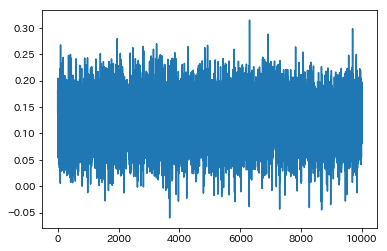

In [37]:
plt.plot(gs.beta[2][10000:])
plt.show()

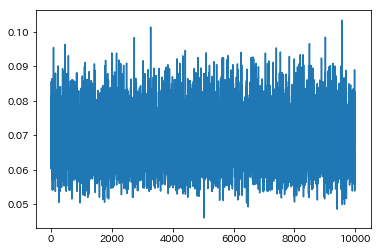

In [52]:
plt.plot(np.sqrt(1 / gs.sigma[10000:]))
plt.show()

## 多項ロジットのMH

In [79]:
import gibbs 
import mh_algorithm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from res_note import *
data = pd.read_csv("multi-nomial.csv")
data = data.iloc[:, 1:13]
mh_multi = mh_algorithm.MultiLogit(2, 4)
hess = mh_multi.derive_hess(np.array(data.iloc[:, 0:4]), np.array(data.iloc[:, 4:12]))
%time accept_rate = mh_multi.multi_logit(np.array(data.iloc[:, 0:4]), \
                                         np.array(data.iloc[:, 4:12]), \
                                         iter=10000, \
                                         beta_0=np.zeros(5), \
                                         sigma=np.identity(5) / 10000, \
                                         scale=((2.4 / np.sqrt(5)) ** 2) * hess)
print(accept_rate)

CPU times: user 7.79 s, sys: 32 ms, total: 7.83 s
Wall time: 7.84 s
0.2874


In [80]:
print(np.mean(mh_multi.beta[0][5000:]))
print(np.mean(mh_multi.beta[1][5000:]))
print(np.mean(mh_multi.beta[2][5000:]))
print(np.mean(mh_multi.beta[3][5000:]))
print(np.mean(mh_multi.beta[4][5000:]))

1.9680178169
1.08429650584
0.0180332604299
-4.84431733182
2.01452399319


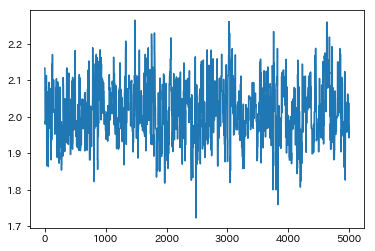

In [81]:
plt.plot(mh_multi.beta[4][5000:])
plt.show()

## 多項プロビットのデータ拡大法ギブス

In [3]:
hoge = np.random.normal(0, 1, 40)
mp.tran_normal(np.zeros(40), 1, hoge, np.inf)

array([-0.41143081,  0.20431178, -0.20914291, -0.25659485,  1.94005354,
        1.08271273,  1.09711078,  2.00801304,  0.45853417,  1.4248796 ,
        1.4246084 ,  1.06975945,  0.17167556,  1.2209339 ,  1.22545029,
        1.33917984, -0.19593683,  1.23237683,  1.93878777,  1.4691489 ,
        1.92073028,  0.68216371,  0.13174491,  0.86135426,  2.24032821,
        0.5606839 ,  1.05368577,  0.91866826,  1.83501436,  1.00584108,
        0.36020611,  0.69792355,  1.26151295,  0.71801154,  0.78694291,
        1.49346641,  1.55241813,  1.57986952,  0.58821495,  1.16801229])

In [1]:
import gibbs 
import mh_algorithm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from res_note import *
data = pd.read_csv("multi-nomial.csv")
y = np.array(data.iloc[:, 2:5])
x = np.array(data.iloc[:, 5:])

In [2]:
mp = gibbs.GibbsProbit(2, 4, 2000)
beta_mean = np.zeros(5)
beta_sigma = 1 / 100 * np.identity(5)
df = 6
v = 1/df * np.identity(3)
%time mp.gibbs_linear(y,x,10000, beta_mean, beta_sigma, df, v)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.27880173  0.          0.          0.          0.
  0.          0.35805021  0.24823402  0.          0.          0.          0.
  0.          0.          0.          0.          0.62398497  0.15097329
  0.          0.          0.01772921  0.          0.37376759  0.60004591
  0.07711995  0.          0.17537682  0.          0.          0.          0.
  1.15973604  0.          0.38676298  0.19070184  0.11696622  0.          0.
  0.          0.13752361  0.          0.          0.62785112  0.          0.
  0.          0.          0.          0.          0.          0.62937989
  0.          0.          0.          0.          0.          0.
  0.68214719  0.          0.          0.          0.23563094  0.24061121
  0.07581392  0.          0.11446062  0.          0.          0.          0.
  0.04166068  0.          0.          0.          0.10428531  0.          0.
  0.          0.          0

[ 0.          0.          0.19271695  0.          0.          0.          0.
  0.07016627  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.27761564  0.          0.
  0.          0.          0.          0.          0.          0.08536239
  0.01655548  0.          0.          0.          0.          0.19474252
  0.          0.          0.32714216  0.          0.          0.21229825
  0.          0.61730157  0.          0.          0.14707026  0.37307538
  0.          0.          0.          0.          0.          0.          0.
  0.          0.42961393  0.          0.16104465  0.54775591  0.53768476
  0.67072371  0.48995347  0.          0.          0.03227094  0.          0.
  0.          0.          0.          0.72592658  0.          0.45751131
  0.08993974  0.          0.          0.          0.          0.          0.
  0.          0.36765246  0.          0.          0.          0.          0.
  0.          0.       

[  8.54349139e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   8.04284048e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.11284894e-01
   0.00000000e+00   0.00000000e+00   4.47394588e-02   4.09313675e-03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   7.93333824e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.51507581e-01
   0.00000000e+00   6.55861895e-02   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.61763188e-01   4.10360428e-01
   0.00000000e+00   1.74785230e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.77165506e-02   0.00000000e+00   6.61403372e-01   0.00000000e+00
   3.90820780e-01   3.02917182e-01

[ 0.31870511  0.36929438  0.11829862  0.34019621  0.2713708   0.16002813
  1.17090926  0.73046778  0.70664     0.61384593  0.26682379  0.41219214
  0.6099222   1.77643478  0.02700673  0.50639975  0.40895962  0.03782902
  0.92722031  0.52368368  0.35187324  0.42727738  1.00119097  0.53531003
  0.53175689  0.81956487  1.54983139  0.84478338  1.47733623  1.16268295
  0.79535448  0.64192622  0.46103964  0.69737903  2.18826797  1.54719487
  0.71563518  0.49403285  0.36724883  0.44242322  0.66002412  0.45697863
  0.70191994  0.67063731  1.90767197  0.82018511  0.46981383  0.34133255
  0.21454741  1.13897437  0.96851142  0.20186931  0.58105199  2.55841471
  0.66219703  0.58612416  1.30901024  0.39815888  0.15615602  1.41747177
  0.80534668  0.25325743  1.37287207  0.71878904  0.74837047  1.06610875
  0.77431027  0.20653378  0.19256417  1.11389943  0.40118115  0.24815598
  0.61080005  0.70601396  1.24201613  1.12914983  0.20764254  0.13559037
  0.78815289  0.62148817  0.70011761  0.39497068  0

[ 0.          0.          0.          0.29302889  0.          0.          0.
  0.          0.          0.          0.03622268  0.          0.          0.
  0.          0.          0.          0.92567874  0.14390747  0.02821773
  0.          0.          0.          0.          0.02869137  0.          0.
  0.          0.23103972  0.          0.          0.          0.          0.
  0.          0.09060683  0.43166929  0.33939136  0.          0.
  0.71979655  0.          0.          0.          0.          0.          0.
  0.          0.0471396   0.38872427  0.          0.13050258  0.
  0.24802179  0.27476257  0.31784312  0.85681841  1.65170132  0.
  0.14623811  0.06937156  0.          0.42570582  0.44221651  0.7128763   0.
  0.          0.48392117  0.          0.2658085   0.          0.          0.
  0.0611552   0.90739947  0.          0.          0.44634484  0.
  0.69598308  0.51621646  0.          0.72336336  0.          0.          0.
  0.86973631  0.          0.          0.          0

[  8.91049144e-01   3.33371199e-01   5.72228782e-01   3.62877570e-02
   1.46469029e+00   9.22940276e-01   2.08760108e-02   9.79116637e-01
   8.57056705e-02   1.56898043e+00   1.30248895e+00   2.07673977e-01
   6.75686206e-01   1.75104650e-01   6.60524695e-01   6.36595550e-01
   8.14920557e-01   7.70710916e-01   1.48139302e+00   1.05363117e+00
   1.21112732e+00   4.77888984e-01   1.95711698e-01   6.97339390e-02
   1.28347804e+00   4.64058033e-02   6.38492918e-01   8.53752779e-01
   3.36323305e-01   7.68132223e-01   4.76791609e-01   4.43980917e-01
   2.19632299e-01   4.66442861e-01   5.46025504e-02   5.54314266e-01
   1.45972921e-01   1.10009493e-01   1.66005019e-01   1.33809096e+00
   8.93055607e-01   3.57857430e-01   2.87447267e-01   8.61275925e-02
   5.92134833e-01   1.47517269e+00   3.16142570e-01   2.97643491e-01
   3.12781828e+00   3.57598189e-01   6.41649308e-02   4.40362290e-01
   2.86441690e-02   9.83328703e-01   2.11084563e+00   1.29531391e+00
   4.90202182e-01   4.67600714e-01

[  0.00000000e+00   1.43097696e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.21220211e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.34317052e-02   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.90125076e-03   7.09201013e-02   3.06935232e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.77513936e-01   6.07404753e-01
   0.00000000e+00   3.04632621e-01   0.00000000e+00   1.99555427e-01
   0.00000000e+00   0.00000000e+00   1.78188305e-01   0.00000000e+00
   0.00000000e+00   3.18504019e-01   0.00000000e+00   0.00000000e+00
   1.14067420e+00   0.00000000e+00   1.00889345e+00   6.40437142e-01
   1.90476765e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.36774172e-02   0.00000000e+00   2.64693271e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   5.28344507e-01

[  2.98983096e-01   1.16199930e+00   2.94552398e-01   6.43120826e-01
   9.49417250e-01   9.96042662e-01   2.71944735e-01   1.91845025e-01
   1.37151063e-01   1.28398567e-01   1.78693350e+00   8.31682243e-02
   6.18169417e-01   3.63707682e-01   2.87355657e-01   1.09694269e+00
   3.02168613e-01   4.49225476e-01   1.29099305e+00   3.56345447e-01
   1.24694992e-01   3.00018494e-01   3.28565413e-01   6.24530409e-01
   7.68085381e-01   4.26374266e-01   7.56209501e-01   2.40526628e+00
   2.89239406e-01   2.09122575e-01   1.40747630e+00   4.82846763e-01
   4.85511571e-01   1.06371021e+00   1.20648800e+00   3.95638944e-01
   1.09583697e+00   1.07318852e+00   1.97743454e+00   7.17922416e-01
   3.96196435e-01   3.47902107e-01   7.96542522e-01   4.70324433e-01
   1.29172716e+00   1.38954555e-01   4.55941152e-02   6.61096028e-03
   1.17587329e+00   1.98914222e-01   1.64216035e+00   1.87694919e-01
   1.57566370e+00   1.23007229e+00   4.75821172e-01   9.62662063e-01
   2.70896920e-01   5.37838337e-01

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.11411768e-02   7.59629909e-01   0.00000000e+00   1.67665234e-02
   0.00000000e+00   0.00000000e+00   1.18305633e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.07545198e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.84519422e-01   1.95566267e-01   0.00000000e+00   5.09389759e-01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.03021812e-01   6.13585013e-01
   0.00000000e+00   0.00000000e+00   6.75214276e-02   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.32827063e-02   0.00000000e+00
   2.68978157e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

[  2.29188818e-01   3.93959493e-01   4.02858884e-02   1.66597754e-01
   1.41545296e-01   3.65605470e-02   3.26371446e-01   8.04285326e-01
   1.63322340e-01   2.80369855e-01   7.65916451e-01   8.53381301e-01
   1.14247104e+00   1.19939238e+00   6.69691256e-01   1.07284055e+00
   8.20463552e-01   5.94271776e-02   1.12886544e+00   7.16944102e-01
   4.73966842e-01   6.61862247e-01   8.81576905e-01   8.13625913e-01
   6.33959151e-01   6.30764650e-01   2.10723403e-01   8.63098510e-01
   1.52903606e-01   9.83735431e-01   5.76052345e-01   1.19754913e+00
   9.78576978e-01   3.67688198e-02   5.08712306e-01   4.86440054e-01
   5.97486441e-01   1.05438480e+00   1.08951970e+00   4.59256963e-01
   5.67199829e-01   5.65659540e-02   1.23807517e+00   3.74890982e-01
   6.23996987e-01   7.51705354e-01   2.55681380e-01   2.76039221e-01
   4.82043546e-01   6.06739202e-01   7.34739829e-01   2.95844495e-01
   1.14094938e+00   2.66068872e-02   1.64329755e-01   1.37449847e+00
   8.80430029e-01   3.18934063e-01

KeyboardInterrupt: 

In [3]:
print(np.mean(mp.beta[0][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[1][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[2][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[3][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[4][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))

-2.83105884904
1.13572980618
-0.714891497245
-1.30341973666
-1.39149743055


In [4]:
print(np.mean(np.array([hoge[0][1] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[0][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[1][1] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[1][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[2][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))

-0.0365503917555
-0.0584036234482
0.950267375793
-0.0233439346507
1.15272175202


In [19]:
class GibbsProbit:
    def __init__(self, dim_beta, dim_choice, n):
        self.beta = np.zeros((dim_beta + dim_choice - 1, 1))
        self.z = [np.zeros((n, dim_choice - 1))]
        self.dim_beta = dim_beta
        self.dim_choice = dim_choice
        self.dim = dim_beta + dim_choice - 1
        self.sigma = [np.identity(self.dim_choice - 1)]

    def gibbs_linear(self, y, x, it, beta_0, sigma_beta, df, scale):
        x = self.transform_x(x)
        index = []
        ind_y = []
        ind_not = []
        for i in range(self.dim_choice - 1):
            ind = np.ones(self.dim_choice - 1, dtype=bool)
            ind[i] = False
            index.append(ind)
            ind_y.append(y[:, i] == 1)
            ind_not.append(y[:, i] == 0)
        for i in range(it):
            self.z.append(self.generate_z(y, x, self.beta[:, -1], index, ind_y, ind_not))
            self.beta = np.append(
                self.beta, self.generate_beta(y, x, self.z[-1], beta_0, sigma_beta).reshape(self.dim, 1), axis=1)
            self.sigma.append(self.generate_sigma(self.z[-1], x, self.beta[:, -1], df, scale))

    def generate_z(self, y, x, beta, ind, ind_y, ind_not):
        # 問題あり
        z = np.zeros((y.shape[0], self.dim_choice - 1))
        tmp = np.zeros(y.shape[0])
        utility = np.dot(x, beta)
        for i in range(self.dim_choice - 1):
            f = np.dot(np.linalg.inv(self.sigma[-1])[:, ind[i]][ind[i]], self.sigma[-1][:, i][ind[i]])
            m = utility[:, i] + np.dot(f.T, (self.z[-1][:, ind[i]] - utility[:, ind[i]]).T)
            tau = np.sqrt(self.sigma[-1][i][i] - np.dot(self.sigma[-1][i][ind[i]], f))
            can = np.append(self.z[-1][:, ind[i]], np.zeros((y.shape[0], 1)), axis=1)
            w_max = np.amax(can, axis=1)
            tmp[ind_y[i]] = self.tran_normal(m[ind_y[i]], tau, w_max[ind_y[i]], np.inf)
            tmp[ind_not[i]] = self.tran_normal(m[ind_not[i]], tau, -np.inf, w_max[ind_not[i]])
            z[:, i] = tmp
        return z

    def generate_beta(self, y, x, z, mu_beta, sigma_beta):
        c = np.linalg.cholesky(np.linalg.inv(self.sigma[-1]))
        z = z.reshape((y.shape[0], self.dim_choice - 1, 1))
        left_new = np.dot(c, z).reshape((y.shape[0] * (self.dim_choice - 1), 1))
        right_new = np.dot(c, x).reshape((y.shape[0] * (self.dim_choice - 1), self.dim))
        sig = np.linalg.inv(np.dot(right_new.T, right_new) + sigma_beta)
        mu = np.dot(sig, (np.dot(right_new.T, left_new).reshape(self.dim) + np.dot(sigma_beta, mu_beta)))
        return np.random.multivariate_normal(mu, sig)

    def generate_sigma(self, z, x, beta, df, scale):
        new_df = x.shape[0] + df
        eps = z - np.dot(x, beta)
        new_scale = scale + np.dot(eps.T, eps)
        result = stats.invwishart.rvs(new_df, new_scale)
        return result

    def transform_x(self, x):
        tmp = np.ndarray((x.shape[0], 0))
        for i in range(self.dim_choice - 1):
            tmp = np.append(tmp, x[:, 1 + i::self.dim_choice] - x[:, 0::self.dim_choice], axis=1)
            intercept = np.zeros((x.shape[0], self.dim_choice - 1))
            intercept[:, i] = 1
            tmp = np.append(tmp, intercept, axis=1)
        return tmp.reshape((x.shape[0], self.dim_choice - 1, self.dim))

    def tran_normal(self, mu, sigma, a, b):
        fa = stats.norm.cdf(x=a, loc=mu, scale=sigma)
        fb = stats.norm.cdf(x=b, loc=mu, scale=sigma)
        return stats.norm.ppf(fa + np.random.uniform(0, 1, len(mu)) * (fb - fa), mu, sigma)


In [20]:
tmp = pd.read_csv("tmp.csv")
tmp = np.array(tmp)
mp = GibbsProbit(2, 4, 2000)
beta_mean = np.zeros(5)
beta_sigma = 1 / 100 * np.identity(5)
df = 6
v = 1/df * np.identity(3)
%time mp.gibbs_linear(y,x,10000, beta_mean, beta_sigma, df, v)

ValueError: array must not contain infs or NaNs

In [13]:
print(np.mean(mp.beta[0][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[1][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[2][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[3][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[4][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))

-2.82085604649
1.13128690792
-0.712382270382
-1.29795874892
-1.37943770555


In [15]:
print(np.mean(mp.beta[0][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[1][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[2][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[3][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[4][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))

-2.68566977535
1.09238869893
-0.586061292411
-1.06214813872
-1.10935268113


In [14]:
print(np.mean(np.array([hoge[0][1] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[0][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[1][1] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[1][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[2][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))

-0.0372963842099
-0.0548093182571
0.945210154653
-0.0217642331974
1.13991120641


## 別のデータ

In [141]:
data = pd.read_table("ch5data.txt", sep="\t")
y = np.array(data.iloc[:, 4:7])
x = np.array(data.iloc[:, 7:])

In [144]:
p = 4
k = 4
mp = GibbsProbit(p, k, y.shape[0], 4)
beta = np.zeros(p - 1 + k)
sigma = 1 / 100 * np.identity(p - 1 + k)
v = 6 * np.identity(3)
%time mp.gibbs_linear(y,x,10000, beta, sigma, 6, v)
slack_inform()

CPU times: user 1min 22s, sys: 994 ms, total: 1min 23s
Wall time: 1min 25s


In [145]:
print(np.mean(mp.beta[0][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[1][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[2][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[3][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[4][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[5][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))
print(np.mean(mp.beta[6][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:])))

-1.51972659846
0.0618620645173
0.293716409243
0.401460133123
-0.785234704411
-0.548327017492
0.807818375923


In [146]:
print(np.mean(np.array([hoge[0][1] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[0][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[1][1] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[1][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))
print(np.mean(np.array([hoge[2][2] for hoge in mp.sigma][5000:]) / [hoge[0][0] for hoge in mp.sigma][5000:]))

0.00537897775217
-0.0538608099969
1.0014764184
-0.0538944347566
1.00891834902


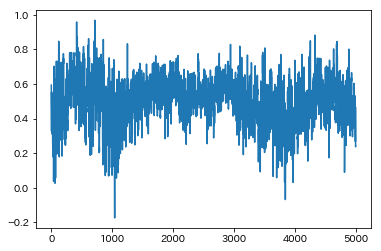

In [80]:
plt.plot(mp.beta[0][5000:] / np.sqrt([hoge[0][0] for hoge in mp.sigma][5000:]))
plt.show()

## ロジットの階層モデル

In [1]:
import gibbs 
import hierarchical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from res_note import *

In [2]:
data = pd.read_csv("hier_logit_all.csv")
z = pd.read_csv("hier_logit_person.csv")
y = np.array(data.iloc[:, 1])
x = np.array(data.iloc[:, 2:])
z = np.array(z)
index = np.array(data.iloc[:, 0])

In [12]:
hl = hierarchical.HierLogit(200, 3, 2)
mu_delta = np.zeros((2, 3))
sigma_delta = 1 / 100 * np.identity(2)
df = 8
scale = df * np.identity(3)
random = 1.5
%time hl.estimate(y, x, z, index, 10000, mu_delta, sigma_delta, df, scale, random)

/Users/kosuke/雑感/bayes_implement/hierarchical.py:36: RuntimeWarning: divide by zero encountered in log
  return np.dot(y, np.log(p)) + np.dot((1-y), np.log(1-p))


CPU times: user 11min 50s, sys: 2min 19s, total: 14min 9s
Wall time: 14min 25s


In [11]:
hl.summary(4, 1000)

delta
[[-2.39798006  2.66960075 -0.36671712]
 [-1.1117832   1.05868463  1.44567614]]
sigma
[[ 2.22783885  0.43004792  0.7970694 ]
 [ 0.43004792  1.44169388  0.46786989]
 [ 0.7970694   0.46786989  1.80513601]]


In [6]:
hl.summary(4, 1000)

delta
[[-2.1669852   2.43503108 -0.34551473]
 [-0.8924326   0.91580519  1.30129994]]
sigma
[[ 1.43790852  0.54020065  0.93338866]
 [ 0.54020065  1.05392409  0.61913897]
 [ 0.93338866  0.61913897  1.29169097]]


In [9]:
hl.accept / 2000000

0.25005

In [ ]:
class HierLogit:
    def __init__(self, n, k, j):
        self.beta = np.zeros((1, n, k))
        self.delta = np.zeros((1, j, k))
        self.sigma = np.identity(k).reshape(1, k, k)
        self.n = n
        self.k = k
        self.j = j
        self.accept = 0

    def estimate(self, y, x, z, index, it=10000, mu_delta=0, sigma_delta=0, df=6, scale=1, random=0.01):
        for _ in range(it):
            random_var = random * self.sigma[-1]
            beta_tmp = np.zeros((0, self.k))
            for i in range(self.n):
                y_ind = y[index == i]
                x_ind = x[index == i]
                z_ind = z[i]
                beta_tmp = np.append(beta_tmp, self.mh(
                    y_ind, x_ind, z_ind, self.beta[-1][i], self.delta[-1], self.sigma[-1], random_var), 0)
            self.beta = np.append(self.beta, beta_tmp.reshape(1, self.n, self.k), 0)
            delta = self.generate_delta(z, mu_delta, self.sigma[-1], sigma_delta).reshape(1, self.j, self.k)
            self.delta = np.append(self.delta, delta, 0)
            sig = self.generate_sigma(self.beta[-1], self.delta[-1], z, df, scale).reshape(1, self.k, self.k)
            self.sigma = np.append(self.sigma, sig, 0)

    def loglik(self, param, y, x):
        u = np.exp(np.dot(x, param))
        p = u / (1 + u)
        return np.dot(y, np.log(p)) + np.dot((1-y), np.log(1-p))

    def loglik_multinormal(self, y, z, delta, sigma):
        mu = np.dot(delta.T, z)
        return -0.5 * np.dot(np.dot((y - mu).T, np.linalg.inv(sigma)), y - mu)

    def mh(self, y, x, z, param, delta, sigma, random):
        beta_old = param
        beta_new = np.random.multivariate_normal(beta_old, random)
        loglik_new = self.loglik(beta_new, y, x)
        loglik_new_prior = self.loglik_multinormal(beta_new, z, delta, sigma)
        loglik_old = self.loglik(beta_old, y, x)
        loglik_old_prior = self.loglik_multinormal(beta_old, z, delta, sigma)
        accept_prob = np.exp(loglik_new + loglik_new_prior - loglik_old - loglik_old_prior)
        if math.isnan(accept_prob):
            accept_prob = -1
        u = np.random.uniform(0.0, 1.0, 1)
        if u < accept_prob:
            self.accept += 1
            return beta_new.reshape(1, self.k)
        else:
            return beta_old.reshape(1, self.k)

    def generate_delta(self, z, mu_delta, sigma, sigma_delta):
        z_pow = np.dot(z.T, z)
        tmp_var = np.linalg.inv(z_pow + sigma_delta)
        var = np.kron(sigma, tmp_var)
        delta_tilde = np.dot(np.dot(np.linalg.inv(z_pow), z.T), self.beta[-1])
        mean = np.dot(tmp_var, np.dot(z_pow, delta_tilde) + np.dot(sigma_delta, mu_delta))
        return np.random.multivariate_normal(mean.reshape(-1,), var)

    def generate_sigma(self, beta, delta, z, df, scale):
        np.random.uniform(0.0, 10000.0, self.k ** 2)
        return 

    def summary(self, keep, burnin):
        beta = self.beta[0::keep]
        sigma = self.sigma[0::keep]
        delta = self.delta[0::keep]
        print("delta")
        print(np.apply_along_axis(np.mean, 0, delta[burnin+1:]))
        print("sigma")
        print(np.apply_along_axis(np.mean, 0, sigma[burnin+1:]))

In [17]:
16*55

880